## Data Exploration Analysis
In this section the data is going to be explored and identify the insights.

In [1]:
# importing library

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
import seaborn as sns

In [2]:
# path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
# importing custom library 
from data_info import DataInfo
from VisualisationPlots import VisualiseDf

In [4]:
# reading
df_nfx = pd.read_csv('../data/NFLX.csv')

In [8]:
df_nfx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-11,633.200012,639.419983,626.780029,627.039978,627.039978,2862500
1,2021-10-12,633.020020,637.659973,621.989990,624.940002,624.940002,3227300
2,2021-10-13,632.179993,632.179993,622.099976,629.760010,629.760010,2420300
3,2021-10-14,632.229980,636.880005,626.789978,633.799988,633.799988,2671700
4,2021-10-15,638.000000,639.419983,625.159973,628.289978,628.289978,4116900


In [5]:
# information
df_info = DataInfo(df_nfx)

In [6]:
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None


In [7]:
# shape of the dataset
df_info.shape_df()

Dataframe contains 252 rows and 7 columns


In [8]:
df_info.get_count_null()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
# null percentage
df_info.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


In [10]:
# statistical info
df_info.describe_stat()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,367.219723,373.217817,359.798849,366.351548,366.351548,9.012981e+06
std,178.632236,179.121200,176.538554,177.474089,177.474089,1.095273e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,219.030006,226.010002,211.610000,218.197502,218.197502,4.185975e+06
50%,349.000000,353.390000,340.335006,343.925003,343.925003,6.523800e+06
75%,545.567521,546.560013,533.570008,540.895020,540.895020,9.992575e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


**Changing Date to datetime datatype**

In [11]:
# to datetime
df_nfx['Date'] = pd.to_datetime(df_nfx['Date'])

### Visualization
in this section the following will covered
- Distribution of the variable
- Correlation 
- Candlestick patterns 

In [12]:
# correlation 
df_nfx.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999567,0.999473,0.998772,0.998772,-0.325665
High,0.999567,1.000000,0.999487,0.999444,0.999444,-0.321803
Low,0.999473,0.999487,1.000000,0.999450,0.999450,-0.336419
Close,0.998772,0.999444,0.999450,1.000000,1.000000,-0.327212
Adj Close,0.998772,0.999444,0.999450,1.000000,1.000000,-0.327212
Volume,-0.325665,-0.321803,-0.336419,-0.327212,-0.327212,1.000000


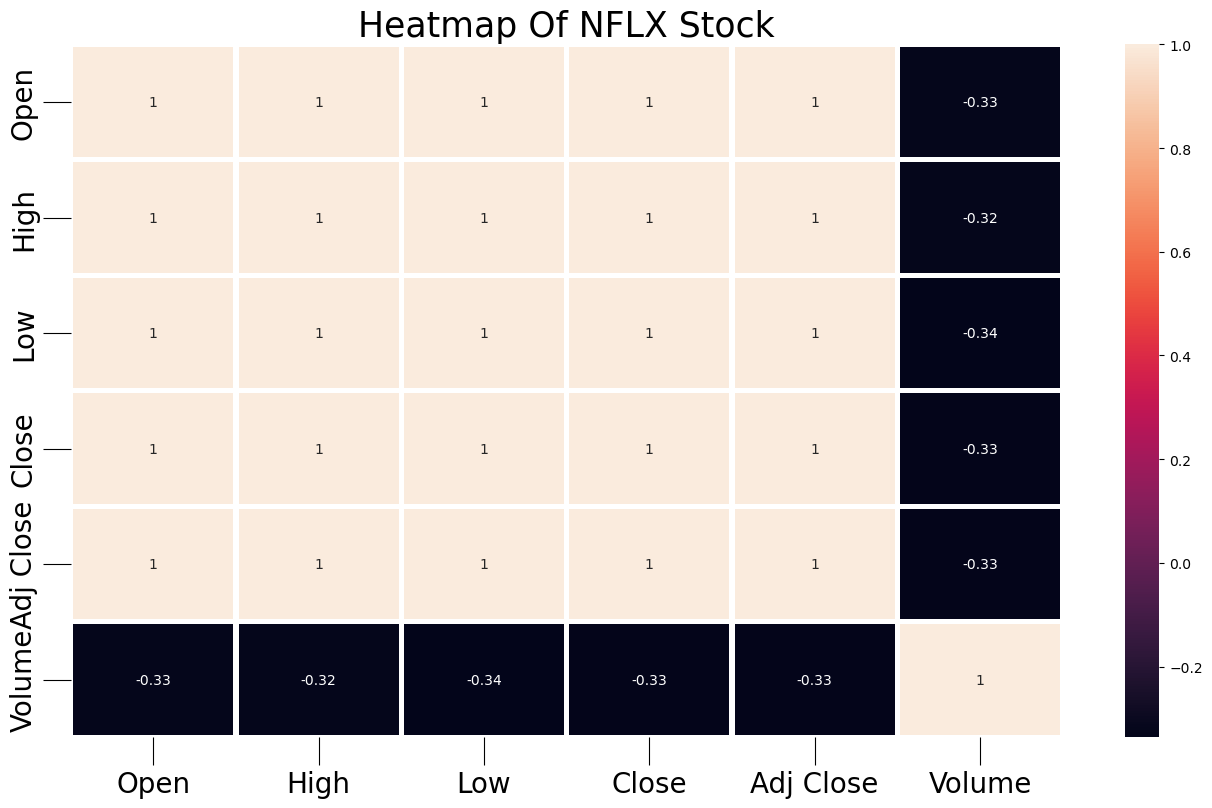

In [13]:
# correlation using heatmap
plt.figure(figsize=(16,9))
ax = sns.heatmap(df_nfx.corr(), annot= True, linewidth=3)
ax.tick_params(size=20, labelsize=20)
plt.title("Heatmap Of NFLX Stock",fontsize=25)
plt.show()


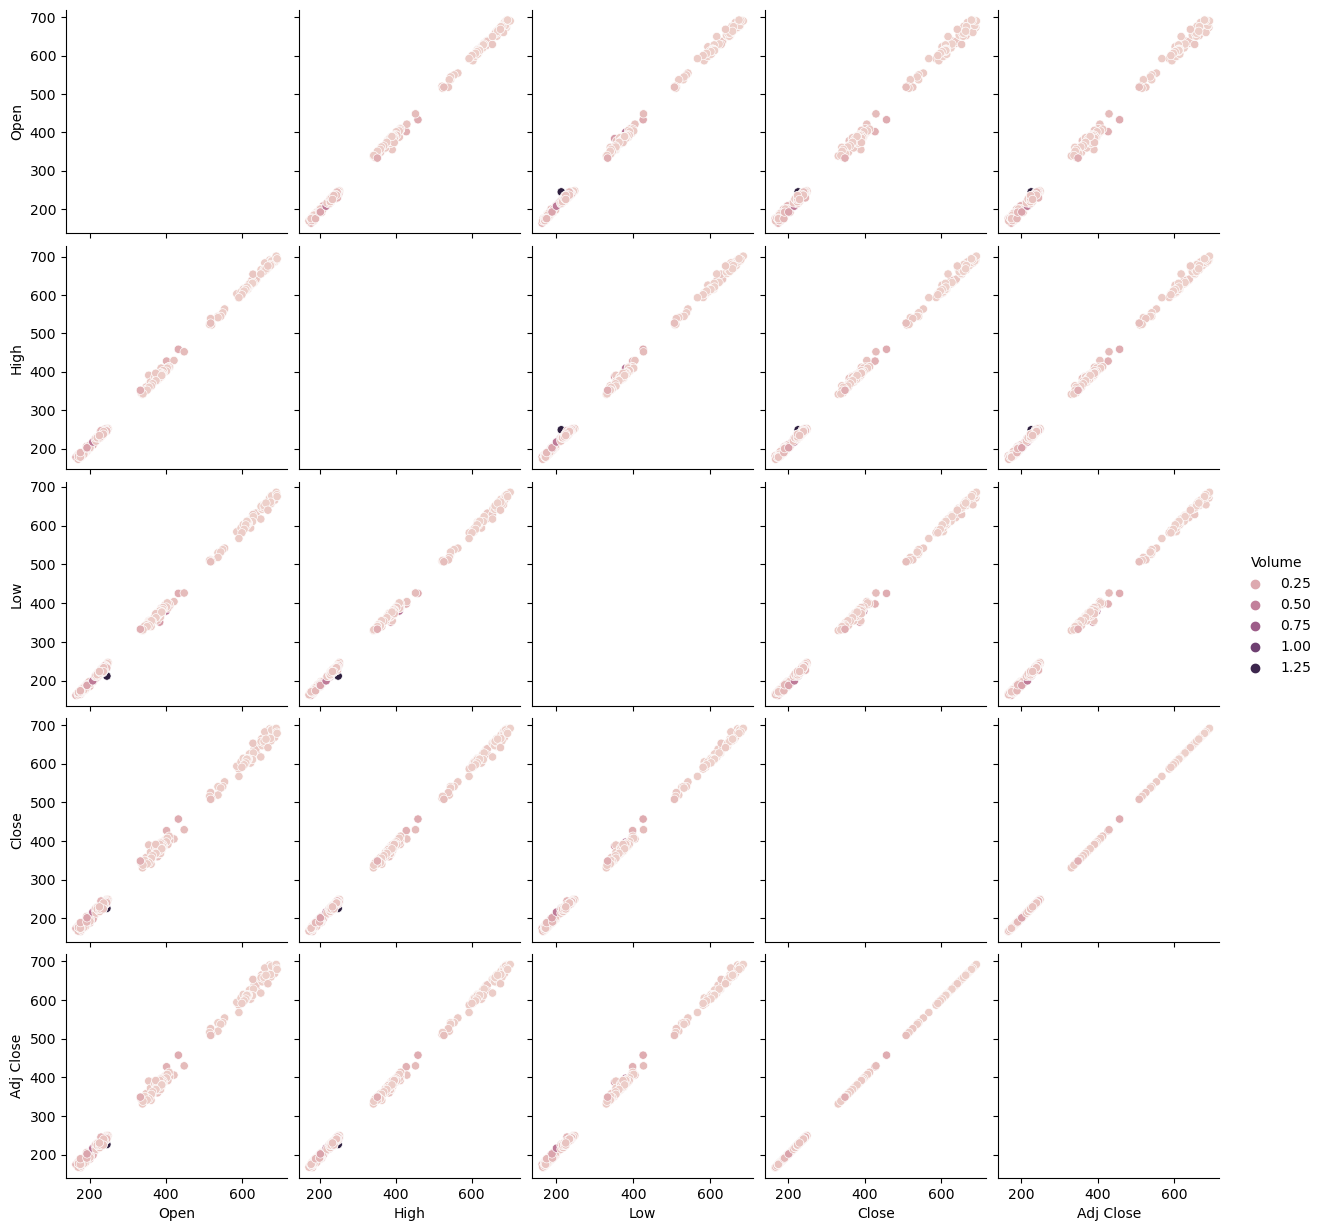

In [14]:
# pairplot
sns.pairplot(df_nfx, hue="Volume")

In [22]:
# # Distribution of dates in terms of broadcasted news 
# plt.title(f'The 10 most dates having better close price ', fontsize=15)

# df_nfx['Date'].groupby('Close').value_counts(ascending = False).head(10).plot(kind ='barh');



In [16]:
# setting date as index and checking the last 100 records
df_nfx.set_index('Date').tail(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10429400
2022-05-23,186.149994,187.660004,177.889999,187.440002,187.440002,9602000
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400
...,...,...,...,...,...,...
2022-10-04,244.839996,245.800003,233.250000,240.740005,240.740005,13925900
2022-10-05,238.759995,241.589996,227.380005,236.729996,236.729996,10825600
2022-10-06,236.679993,244.279999,233.910004,240.020004,240.020004,9188900


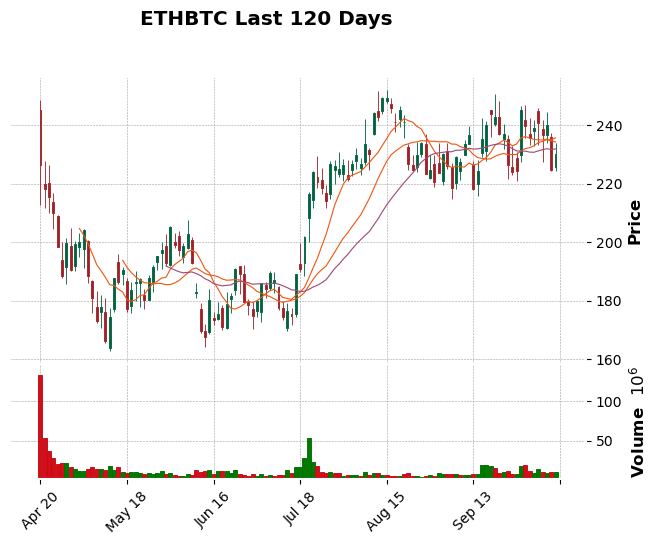

In [17]:
# plot
mpf.plot(df_nfx.set_index('Date').tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHBTC Last 120 Days', 
        mav=(10,20,30))